In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Prepering data

In [50]:
data=pd.read_csv('C:\\Users\\magic\\Downloads\\SampleSuperstore (1).csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:
data.shape

(9994, 13)

In [52]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# checking data

In [56]:
for i in data.columns:
    print(i , len(data[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [57]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Visualization

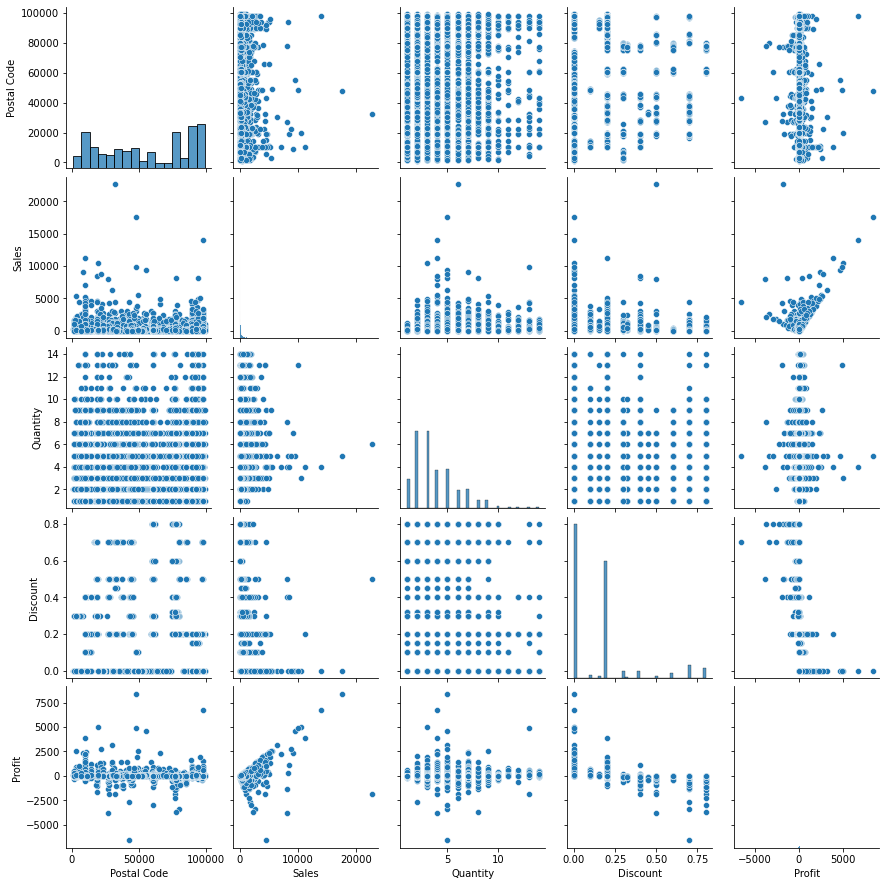

In [59]:
sns.pairplot(data)

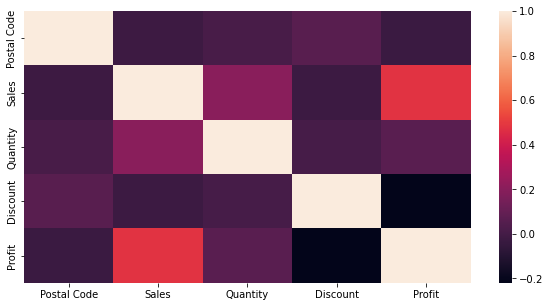

In [61]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.heatmap(data.corr())
plt.show()

<AxesSubplot:xlabel='Sub-Category'>

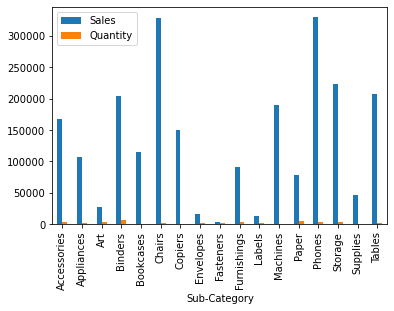

In [65]:
fig.suptitle('Total Sales VS Quality')
data.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

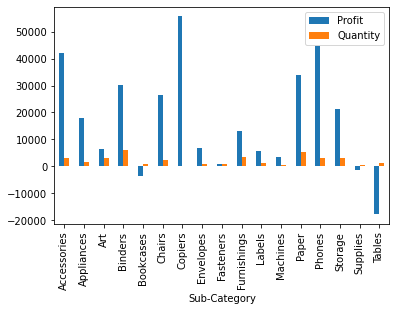

In [66]:
fig.suptitle('Total Profit VS Quality')
data.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar')

<AxesSubplot:xlabel='Discount', ylabel='Density'>

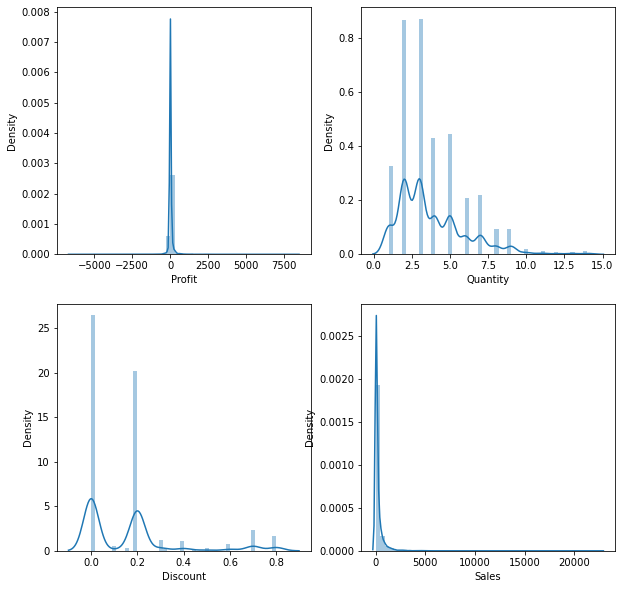

In [69]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.distplot(data['Profit'],ax=ax[0,0])
sns.distplot(data['Quantity'],ax=ax[0,1])
sns.distplot(data['Sales'],ax=ax[1,1])
sns.distplot(data['Discount'],ax=ax[1,0])

<AxesSubplot:xlabel='Quantity', ylabel='count'>

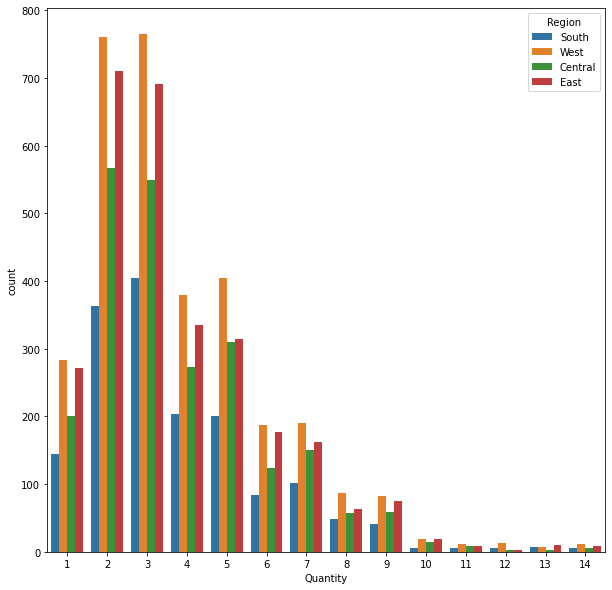

In [71]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.countplot(data['Quantity'],hue=data['Region'])

# Making Prediction

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

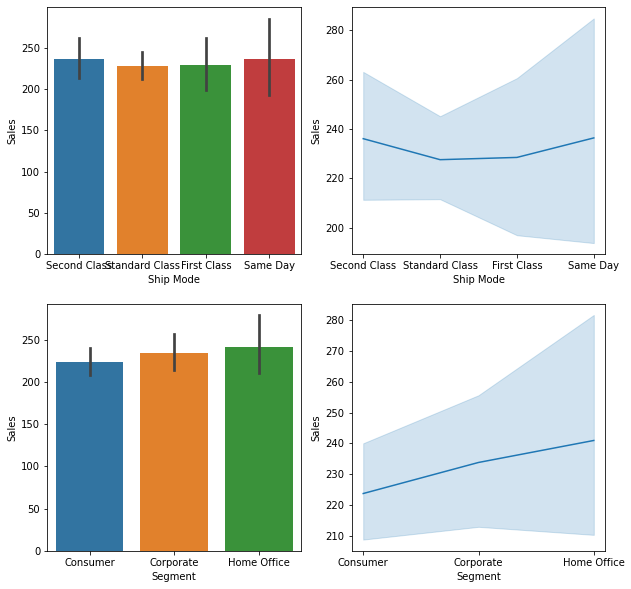

In [74]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.barplot(data['Ship Mode'],data['Sales'],ax=ax[0,0])
sns.lineplot(data['Ship Mode'],data['Sales'],ax=ax[0,1])
sns.barplot(data['Segment'],data['Sales'],ax=ax[1,0])
sns.lineplot(data['Segment'],data['Sales'],ax=ax[1,1])